## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.3f}'.format)

## Import Dataset

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.shape

(10841, 13)

In [3]:
print(f'The number of Rows are "{df.shape[0]}", and the number of columns are "{df.shape[1]}"')

The number of Rows are "10841", and the number of columns are "13"


In [4]:
df.head(3).T

,0,1,2
App,Photo Editor & Candy Camera & Grid & ScrapBook,Coloring book moana,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
Category,ART_AND_DESIGN,ART_AND_DESIGN,ART_AND_DESIGN
Rating,4.100,3.900,4.700
Reviews,159,967,87510
Size,19M,14M,8.7M
Installs,"10,000+","500,000+","5,000,000+"
Type,Free,Free,Free
Price,0,0,0
Content Rating,Everyone,Everyone,Everyone
Genres,Art & Design,Art & Design;Pretend Play,Art & Design


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## Unique values count of each features

In [7]:
for col in df.columns:
    print(col,':', len(df[col].value_counts().index))

App : 9660
Category : 34
Rating : 40
Reviews : 6002
Size : 462
Installs : 22
Type : 3
Price : 93
Content Rating : 6
Genres : 120
Last Updated : 1378
Current Ver : 2832
Android Ver : 33


## Unique values list of few selected features

In [8]:
vc_columns = ['Category','Rating','Installs','Type','Price','Content Rating','Genres','Android Ver']

for col in vc_columns:
    print(col, ':', '\n')
    print( df[col].value_counts().index.tolist(), '\n')

Category : 

['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS', 'PRODUCTIVITY', 'PERSONALIZATION', 'COMMUNICATION', 'SPORTS', 'LIFESTYLE', 'FINANCE', 'HEALTH_AND_FITNESS', 'PHOTOGRAPHY', 'SOCIAL', 'NEWS_AND_MAGAZINES', 'SHOPPING', 'TRAVEL_AND_LOCAL', 'DATING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS', 'EDUCATION', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'AUTO_AND_VEHICLES', 'WEATHER', 'ART_AND_DESIGN', 'EVENTS', 'PARENTING', 'COMICS', 'BEAUTY', '1.9'] 

Rating : 

[4.4, 4.3, 4.5, 4.2, 4.6, 4.1, 4.0, 4.7, 3.9, 3.8, 5.0, 3.7, 4.8, 3.6, 3.5, 3.4, 3.3, 4.9, 3.0, 3.1, 3.2, 2.9, 2.8, 2.7, 2.6, 2.5, 2.3, 2.4, 1.0, 2.2, 1.9, 2.0, 1.7, 1.8, 2.1, 1.6, 1.4, 1.5, 1.2, 19.0] 

Installs : 

['1,000,000+', '10,000,000+', '100,000+', '10,000+', '1,000+', '5,000,000+', '100+', '500,000+', '50,000+', '5,000+', '100,000,000+', '10+', '500+', '50,000,000+', '50+', '5+', '500,000,000+', '1+', '1,000,000,000+', '0+', '0', 'Free'] 

Type : 

['Free', 'P

## Top 5 unique values of each features

In [9]:
def analyze_column_value_counts(df, column_name, top_n=5):
    """
    Provides the top N value counts for a specified column in a DataFrame,
    handling potential errors for non-categorical columns.
    """
    print(f"--- Top {top_n} Value Counts for Column: {column_name} ---")
    try:
        top_values = df[column_name].value_counts().head(top_n)
        print(top_values)
    except TypeError:
        print(f"Cannot calculate value counts for this column (likely numeric or other non-categorical type).")
    except Exception as e:
        print(f"An error occurred: {e}")
    print("\n") # Line break

# List of columns to analyze
columns_to_analyze = df.columns

# Iterate through each column and perform the analysis
for column in columns_to_analyze:
    analyze_column_value_counts(df, column, top_n=5)

--- Top 5 Value Counts for Column: App ---
App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
Name: count, dtype: int64


--- Top 5 Value Counts for Column: Category ---
Category
FAMILY      1972
GAME        1144
TOOLS        843
MEDICAL      463
BUSINESS     460
Name: count, dtype: int64


--- Top 5 Value Counts for Column: Rating ---
Rating
4.400    1109
4.300    1076
4.500    1038
4.200     952
4.600     823
Name: count, dtype: int64


--- Top 5 Value Counts for Column: Reviews ---
Reviews
0    596
1    272
2    214
3    175
4    137
Name: count, dtype: int64


--- Top 5 Value Counts for Column: Size ---
Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
Name: count, dtyp

## Unique data types of each features including NaN

In [10]:
def analyze_column_data_types(df, column_name):
    """
    Scans through all values in a DataFrame column, identifies their data types,
    and provides unique data types with their counts, including NaN.
    """
    data_types = {}
    for value in df[column_name]:
        data_type = type(value)
        if pd.isna(value):
            data_type = 'nan'
        else:
            data_type = str(data_type)  # Convert to string for consistent counting
        data_types[data_type] = data_types.get(data_type, 0) + 1

    print(f"--- Analysis for Column: {column_name} ---")
    for dtype, count in data_types.items():
        print(f"Data Type: {dtype}, Count: {count}")
    print("\n") # Line break

# List of columns to analyze
columns_to_analyze = df.columns

# Iterate through each column and perform the analysis
for column in columns_to_analyze:
    analyze_column_data_types(df, column)

--- Analysis for Column: App ---
Data Type: <class 'str'>, Count: 10841


--- Analysis for Column: Category ---
Data Type: <class 'str'>, Count: 10841


--- Analysis for Column: Rating ---
Data Type: <class 'float'>, Count: 9367
Data Type: nan, Count: 1474


--- Analysis for Column: Reviews ---
Data Type: <class 'str'>, Count: 10841


--- Analysis for Column: Size ---
Data Type: <class 'str'>, Count: 10841


--- Analysis for Column: Installs ---
Data Type: <class 'str'>, Count: 10841


--- Analysis for Column: Type ---
Data Type: <class 'str'>, Count: 10840
Data Type: nan, Count: 1


--- Analysis for Column: Price ---
Data Type: <class 'str'>, Count: 10841


--- Analysis for Column: Content Rating ---
Data Type: <class 'str'>, Count: 10840
Data Type: nan, Count: 1


--- Analysis for Column: Genres ---
Data Type: <class 'str'>, Count: 10841


--- Analysis for Column: Last Updated ---
Data Type: <class 'str'>, Count: 10841


--- Analysis for Column: Current Ver ---
Data Type: <class 'str

## iloc

In [11]:
df.iloc[10474: 10481]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10474,Sat-Fi Voice,COMMUNICATION,3.400,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.900,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.000,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.600,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up
10478,Sci Fi Sounds,FAMILY,3.200,4,8.0M,"1,000+",Free,0,Everyone,Entertainment,"November 2, 2017",1.0,4.0 and up
10479,Free Wi-fi HotspoT,COMMUNICATION,4.100,382,2.3M,"50,000+",Free,0,Everyone,Communication,"July 20, 2018",2.5,4.0 and up
10480,FJ 4x4 Cruiser Offroad Driving,FAMILY,4.100,3543,49M,"500,000+",Free,0,Everyone,Simulation,"January 4, 2017",1.1,2.3 and up


In [12]:
df.iloc[10472:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.000,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                             19.000
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

## Remove row containing outliers

In [14]:
# max is 19.000000 which seems extreme value
# Outliers / Anomalies / Extreme values / Aberrant data points / Contaminants / Noise / Irregularities / Rogue

df.describe()

,Rating
count,9367.000
mean,4.193
std,0.537
min,1.000
25%,4.000
50%,4.300
75%,4.500
max,19.000


In [15]:
df['Rating'].value_counts().sort_values(ascending=True).head(5)

Rating
19.000    1
1.200     1
1.400     3
1.500     3
1.600     4
Name: count, dtype: int64

In [16]:
# It is clear that 19.0 is extreme value and we have to remove it

print( 
    df['Rating'].value_counts().sort_values(ascending=True).index.tolist() 
)

[19.0, 1.2, 1.4, 1.5, 1.6, 2.1, 1.8, 1.7, 2.0, 1.9, 2.2, 1.0, 2.4, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9, 3.2, 3.1, 3.0, 4.9, 3.3, 3.4, 3.5, 3.6, 4.8, 3.7, 5.0, 3.8, 3.9, 4.7, 4.0, 4.1, 4.6, 4.2, 4.5, 4.3, 4.4]


In [17]:
# Find the index of extreme value 19.0

index_to_drop = df[df['Rating'] == 19].index
print(index_to_drop)

Index([10472], dtype='int64')


In [18]:
# df.drop(10472, axis=0, inplace=True)
# df = df.drop(index_to_drop)

df.drop(index_to_drop, axis=0, inplace=True)
print(df[df['Rating'] == 19])

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [19]:
# Now max is 5 which seems to correct.

df.describe()

,Rating
count,9366.000
mean,4.192
std,0.515
min,1.000
25%,4.000
50%,4.300
75%,4.500
max,5.000


## Functions to test data types conversion

In [20]:
import pandas as pd

def test_to_integer_conversion(series):
    integer_series = pd.to_numeric(series, errors='coerce', downcast='integer')
    successful_conversions = integer_series.count()
    failed_conversions = integer_series.isnull().sum()
    print(f"Integer Conversion Test:")
    print(f"  Number of successful conversions: {successful_conversions}")
    print(f"  Number of failed conversions (NaN): {failed_conversions}")
    return integer_series

def test_to_float_conversion(series):
    float_series = pd.to_numeric(series, errors='coerce', downcast='float')
    successful_conversions = float_series.count()
    failed_conversions = float_series.isnull().sum()
    print(f"Float Conversion Test:")
    print(f"  Number of successful conversions: {successful_conversions}")
    print(f"  Number of failed conversions (NaN): {failed_conversions}")
    return float_series

def test_to_date_conversion(series, date_format=None):
    date_series = pd.to_datetime(series, errors='coerce', format=date_format).dt.date
    successful_conversions = date_series.count()
    failed_conversions = date_series.isnull().sum()
    print(f"Date Conversion Test:")
    print(f"  Number of successful conversions: {successful_conversions}")
    print(f"  Number of failed conversions (NaT): {failed_conversions}")
    return date_series

def test_to_datetime_conversion(series, datetime_format=None):
    datetime_series = pd.to_datetime(series, errors='coerce', format=datetime_format)
    successful_conversions = datetime_series.count()
    failed_conversions = datetime_series.isnull().sum()
    print(f"Datetime Conversion Test:")
    print(f"  Number of successful conversions: {successful_conversions}")
    print(f"  Number of failed conversions (NaT): {failed_conversions}")
    return datetime_series

# Example usage with DataFrame 'df':
# Assuming 'df' have columns named 'Reviews', 'Price', 'Timestamp', and 'Date'
    
# reviews_int_test = test_to_integer_conversion(df['Reviews'])

# price_float_test = test_to_float_conversion(df['Price'])

# date_test = test_to_date_conversion(df['Date'])
# # date_test_specific_format = test_to_date_conversion(df['Date'], date_format='%m/%d/%Y')

# datetime_test = test_to_datetime_conversion(df['Timestamp'])
# # datetime_test_specific_format = test_to_datetime_conversion(df['Timestamp'], datetime_format='%Y-%m-%d %H:%M:%S')

In [21]:
import pandas as pd

def test_integer_conversion_with_error_handling(series):
    try:
        # Attempt direct conversion using astype('int')
        integer_series = series.astype('int')
        print("Direct integer conversion using astype('int') was successful.")
        return integer_series
    except ValueError as e:
        print(f"Error during direct integer conversion (astype('int')): {e}")
        print("\nAttempting conversion using pd.to_numeric with 'coerce' to handle errors.")
        numeric_series = pd.to_numeric(series, errors='coerce', downcast='integer')
        nan_count = numeric_series.isnull().sum()
        total_count = len(numeric_series)
        nan_percentage = (nan_count / total_count) * 100 if total_count > 0 else 0

        print(f"Number of NaN values after conversion with 'coerce': {nan_count}")
        print(f"Total number of values: {total_count}")
        print(f"Percentage of NaN values: {nan_percentage:.2f}%")
        print("\nIf you proceed with this conversion, these NaN values will replace the original non-convertible entries.")
        return numeric_series

def test_float_conversion_with_error_handling(series):
    try:
        # Attempt direct conversion using astype('float')
        float_series = series.astype('float')
        print("Direct float conversion using astype('float') was successful.")
        return float_series
    except ValueError as e:
        print(f"Error during direct float conversion (astype('float')): {e}")
        print("\nAttempting conversion using pd.to_numeric with 'coerce' to handle errors.")
        numeric_series = pd.to_numeric(series, errors='coerce', downcast='float')
        nan_count = numeric_series.isnull().sum()
        total_count = len(numeric_series)
        nan_percentage = (nan_count / total_count) * 100 if total_count > 0 else 0

        print(f"Number of NaN values after conversion with 'coerce': {nan_count}")
        print(f"Total number of values: {total_count}")
        print(f"Percentage of NaN values: {nan_percentage:.2f}%")
        print("\nIf you proceed with this conversion, these NaN values will replace the original non-convertible entries.")
        return numeric_series

def test_datetime_conversion_with_error_handling(series, datetime_format=None):
    try:
        # Attempt direct conversion using pd.to_datetime
        datetime_series = pd.to_datetime(series)
        print("Direct datetime conversion using pd.to_datetime was successful.")
        return datetime_series
    except ValueError as e:
        print(f"Error during direct datetime conversion (pd.to_datetime): {e}")
        print("\nAttempting conversion using pd.to_datetime with 'coerce'.")
        datetime_series = pd.to_datetime(series, errors='coerce', format=datetime_format)
        nat_count = datetime_series.isna().sum()
        total_count = len(datetime_series)
        nat_percentage = (nat_count / total_count) * 100 if total_count > 0 else 0

        print(f"Number of NaT values after conversion with 'coerce': {nat_count}")
        print(f"Total number of values: {total_count}")
        print(f"Percentage of NaT values: {nat_percentage:.2f}%")
        print("\nIf you proceed with this conversion, these NaT values will replace the original non-convertible entries.")
        return datetime_series

def test_date_conversion_with_error_handling(series, date_format=None):
    try:
        # Attempt direct conversion using pd.to_datetime and .dt.date
        date_series = pd.to_datetime(series).dt.date
        print("Direct date conversion using pd.to_datetime().dt.date was successful.")
        return date_series
    except ValueError as e:
        print(f"Error during direct date conversion (pd.to_datetime().dt.date): {e}")
        print("\nAttempting conversion using pd.to_datetime with 'coerce' and extracting date.")
        date_series = pd.to_datetime(series, errors='coerce', format=date_format).dt.date
        nat_count = date_series.isna().sum()
        total_count = len(date_series)
        nat_percentage = (nat_count / total_count) * 100 if total_count > 0 else 0

        print(f"Number of NaT values after conversion with 'coerce': {nat_count}")
        print(f"Total number of values: {total_count}")
        print(f"Percentage of NaT values: {nat_percentage:.2f}%")
        print("\nIf you proceed with this conversion, these NaT values will replace the original non-convertible entries.")
        return date_series

# Example usage with DataFrame 'df':
# Assuming 'df' have columns named 'Reviews', 'Price', 'Timestamp', and 'Date'

# Reviews_int_tested = test_integer_conversion_with_error_handling(df['Reviews'])
# Decide whether to replace df['Reviews'] with Reviews_int_tested
# df['Reviews'] = Reviews_int_tested

# Price_float_tested = test_float_conversion_with_error_handling(df['Price'])
# Decide whether to replace df['Price']

# Timestamp_datetime_tested = test_datetime_conversion_with_error_handling(df['Timestamp'])
# If you have a specific format:
# Timestamp_datetime_tested = test_datetime_conversion_with_error_handling(df['Timestamp'], datetime_format='%Y-%m-%d %H:%M:%S')
# Decide whether to replace df['Timestamp']

# df['Date_date_tested'] = test_date_conversion_with_error_handling(df['Date'])
# If you have a specific format:
# df['Date_date_tested'] = test_date_conversion_with_error_handling(df['Date'], date_format='%m/%d/%Y')
# Decide whether to replace df['Date']

## data type conversion: object to integer

In [22]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [23]:
# below test confirm that while converting df['Reviews'] from object to integer no errors occured

x = test_integer_conversion_with_error_handling(df['Reviews'])

Direct integer conversion using astype('int') was successful.


In [24]:
df['Reviews'] = df['Reviews'].astype('int')
df['Reviews'].dtypes

dtype('int32')

In [25]:
df.describe()

,Rating,Reviews
count,9366.000,10840.000
mean,4.192,444152.896
std,0.515,2927760.604
min,1.000,0.000
25%,4.000,38.000
50%,4.300,2094.000
75%,4.500,54775.500
max,5.000,78158306.000


## data type conversion: alpha-numeric string to integer: df['Size']

In [26]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [27]:
df['Size'].value_counts().head(10)

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
Name: count, dtype: int64

In [28]:
df['Size'].value_counts().tail(10)

Size
412k    1
459k    1
478k    1
782k    1
721k    1
430k    1
429k    1
200k    1
460k    1
619k    1
Name: count, dtype: int64

In [29]:
df['Size'].isnull().sum()

0

In [30]:
# It is observed that there are three categories in 'Size' column:
# string containing 'k' and 'M'
# having string 'Varies with device'

In [31]:
# df['Size'].str.contains('M') ≈ masked True, False, ....
# df['Size'].loc[df['Size'].str.contains('M')] ≈ actual string/rows containing 'M' in df['Size']
# df['Size'].loc[df['Size'].str.contains('M')].value_counts() ≈ unique strings and its counts and these strings containing 'M'
# df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()) ≈ sum of counts

In [32]:
print(
    "Number of M in Size Column", 
    df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()
)

Number of M in Size Column 8829


In [33]:
print(
    "Number of k in Size Column", 
    df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()
)

Number of k in Size Column 316


In [34]:
print(
    "Number of 'Varies with device' in Size Column", 
    df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()
)

Number of 'Varies with device' in Size Column 1695


In [35]:
def convert_into_bytes(column_name):
    if isinstance(column_name, str):
        if 'k' in column_name:
            return float(column_name.replace("k", "")) * 1024
        elif 'M' in column_name:
            return float(column_name.replace("M", "")) * 1024 * 1024
        elif 'Varies with device' in column_name:
            return np.nan
    return column_name

In [36]:
print( df['Size'].dtypes )
print( isinstance(df['Size'], str) )
print( isinstance(df['Size'][1], str) )

object
False
True


In [37]:
# apply function will take one by one value as a string from df['Size'] series/column and run function 'convert_into_bytes' with this string argument

df['Size'] = df['Size'].apply(convert_into_bytes)

In [38]:
df['Size'].head()

0   19922944.000
1   14680064.000
2    9122611.200
3   26214400.000
4    2936012.800
Name: Size, dtype: float64

In [39]:
print( df['Size'].dtypes )

float64


In [40]:
df.rename(columns={'Size': 'Size_bytes'}, inplace=True)

In [41]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver'],
      dtype='object')

In [42]:
# convert bytes into megabytes and make a new column

df['Size_MB'] = df['Size_bytes'] / (1024 * 1024)

In [43]:
df[['Size_bytes', 'Size_MB']].head()

,Size_bytes,Size_MB
0,19922944.000,19.000
1,14680064.000,14.000
2,9122611.200,8.700
3,26214400.000,25.000
4,2936012.800,2.800


## data type conversion: alpha-numeric string to integer: df['Installs']

In [44]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [45]:
df['Installs'].tail()

10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, dtype: object

In [46]:
# Observations:
#     Remove + sign
#     Remove , from the values
#     Convert the column in to integers

In [47]:
# def installs(install):
#     if isinstance(install, str):
#         if '+' in install:
#             return install.replace("+", "")
#     return int(install)

# df['Installs'] = df['Installs'].apply(installs)
# df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
# df['Installs'] = df['Installs'].astype('int')

In [48]:
def clean_and_convert_installs(series):
    cleaned_series = series.str.replace('+', '', regex=False).str.replace(',', '', regex=False)
    integer_series = pd.to_numeric(cleaned_series, errors='coerce', downcast='integer')
    return integer_series

In [49]:
df['Installs'] = clean_and_convert_installs(df['Installs'])

In [50]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [51]:
df['Installs'].isnull().sum()

0

In [52]:
df['Installs'].value_counts().sort_index(ascending=True)

Installs
0               15
1               67
5               82
10             386
50             205
100            719
500            330
1000           907
5000           477
10000         1054
50000          479
100000        1169
500000         539
1000000       1579
5000000        752
10000000      1252
50000000       289
100000000      409
500000000       72
1000000000      58
Name: count, dtype: int64

In [53]:
df['Installs'].value_counts().sort_values(ascending=True)

Installs
0               15
1000000000      58
1               67
500000000       72
5               82
50             205
50000000       289
500            330
10             386
100000000      409
5000           477
50000          479
500000         539
100            719
5000000        752
1000           907
10000         1054
100000        1169
10000000      1252
1000000       1579
Name: count, dtype: int64

## Making a new column called 'Installs_category' which will have the category of the 'Installs'

In [54]:
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [55]:
df['Installs_category'].value_counts()

Installs_category
Low                   2161
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

## data type conversion: dollar string to float: df['Price']

In [56]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [57]:
def adjust_price(price):
    if isinstance(price, str):
        if '$' in price:
            return price.replace("$", "")
    return price

In [58]:
df['Price'] = df['Price'].apply(adjust_price)
df['Price'].dtypes

dtype('O')

In [59]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [60]:
df['Price'] = df['Price'].astype('float')
df['Price'].dtypes

dtype('float64')

In [61]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [62]:
df.describe()

,Rating,Reviews,Size_bytes,Installs,Price,Size_MB
count,9366.000,10840.000,9145.000,10840.000,10840.000,9145.000
mean,4.192,444152.896,22561334.688,15464338.883,1.027,21.516
std,0.515,2927760.604,23686371.701,85029361.395,15.950,22.589
min,1.000,0.000,8704.000,0.000,0.000,0.008
25%,4.000,38.000,5138022.400,1000.000,0.000,4.900
50%,4.300,2094.000,13631488.000,100000.000,0.000,13.000
75%,4.500,54775.500,31457280.000,5000000.000,0.000,30.000
max,5.000,78158306.000,104857600.000,1000000000.000,400.000,100.000


## Missing Values

In [63]:
df.isnull().sum().sort_values(ascending=True)

App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Installs_category       0
Type                    1
Android Ver             2
Current Ver             8
Rating               1474
Size_bytes           1695
Size_MB              1695
dtype: int64

In [64]:
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.sort_values(ascending=True)

App                  0.000
Category             0.000
Reviews              0.000
Installs             0.000
Price                0.000
Content Rating       0.000
Genres               0.000
Last Updated         0.000
Installs_category    0.000
Type                 0.009
Android Ver          0.018
Current Ver          0.074
Rating              13.598
Size_bytes          15.637
Size_MB             15.637
dtype: float64

<Axes: >

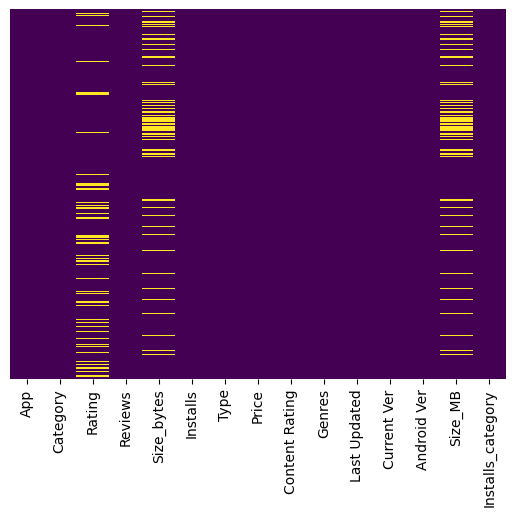

In [65]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

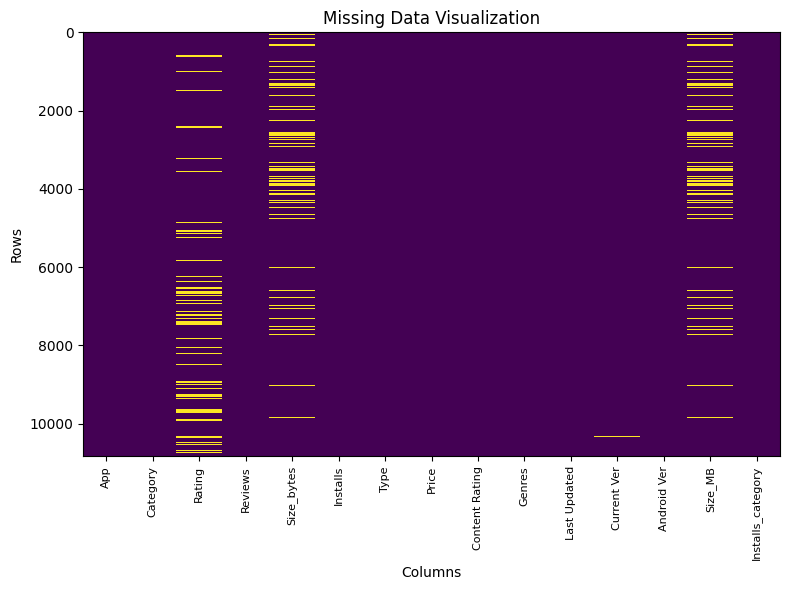

In [66]:
def visualize_missing_matplotlib(df):
    """Visualizes missing data using Matplotlib."""
    
    plt.figure(figsize=(8, 6))
    missing = df.isnull()
    plt.imshow(missing, aspect='auto', cmap='viridis', interpolation='nearest')

    # Show row labels if needed
    # plt.yticks(ticks=np.arange(df.shape[0]), labels=df.index, fontsize=8)

    # Show column labels
    plt.xticks(ticks=np.arange(df.shape[1]), labels=df.columns, rotation=90, fontsize=8)
    
    plt.title("Missing Data Visualization")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    
    # Add a colorbar to explain
    # plt.colorbar(label='Missing (True) / Present (False)')
    
    plt.tight_layout()
    plt.show()

visualize_missing_matplotlib(df)

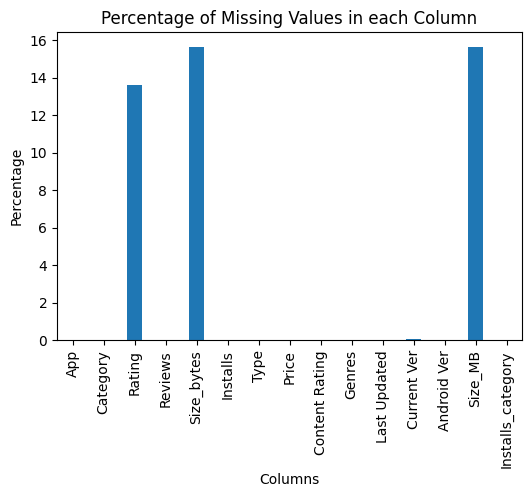

In [67]:
plt.figure(figsize=(6, 4))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')
plt.show()                  

In [68]:
missing_percentage[missing_percentage < 1]

App                 0.000
Category            0.000
Reviews             0.000
Installs            0.000
Type                0.009
Price               0.000
Content Rating      0.000
Genres              0.000
Last Updated        0.000
Current Ver         0.074
Android Ver         0.018
Installs_category   0.000
dtype: float64

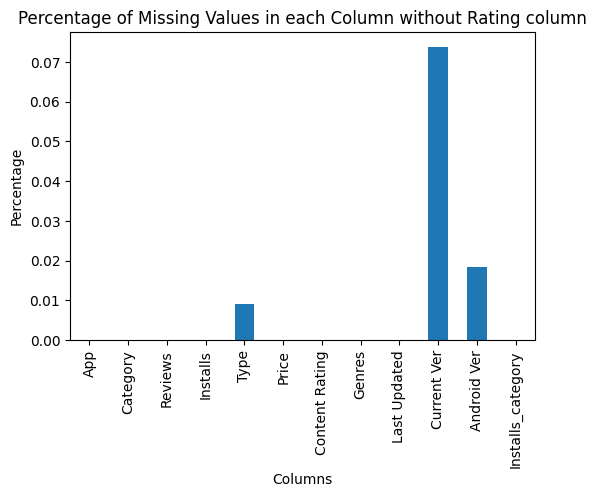

In [69]:
# bar plot where missing_percentage is less than 1

plt.figure(figsize=(6, 4))
missing_percentage[missing_percentage < 1].plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column without Rating column')
plt.show()

## Correlation Test

In [70]:
numeric_cols = [i for i in df.columns if df[i].dtype != 'object' ]
numeric_cols

['Rating',
 'Reviews',
 'Size_bytes',
 'Installs',
 'Price',
 'Size_MB',
 'Installs_category']

In [71]:
numeric_cols.remove("Installs_category")
numeric_cols

['Rating', 'Reviews', 'Size_bytes', 'Installs', 'Price', 'Size_MB']

In [72]:
corr = df[numeric_cols].corr()
corr

,Rating,Reviews,Size_bytes,Installs,Price,Size_MB
Rating,1.000,0.068,0.084,0.051,-0.022,0.084
Reviews,0.068,1.000,0.238,0.643,-0.010,0.238
Size_bytes,0.084,0.238,1.000,0.165,-0.023,1.000
Installs,0.051,0.643,0.165,1.000,-0.012,0.165
Price,-0.022,-0.010,-0.023,-0.012,1.000,-0.023
Size_MB,0.084,0.238,1.000,0.165,-0.023,1.000


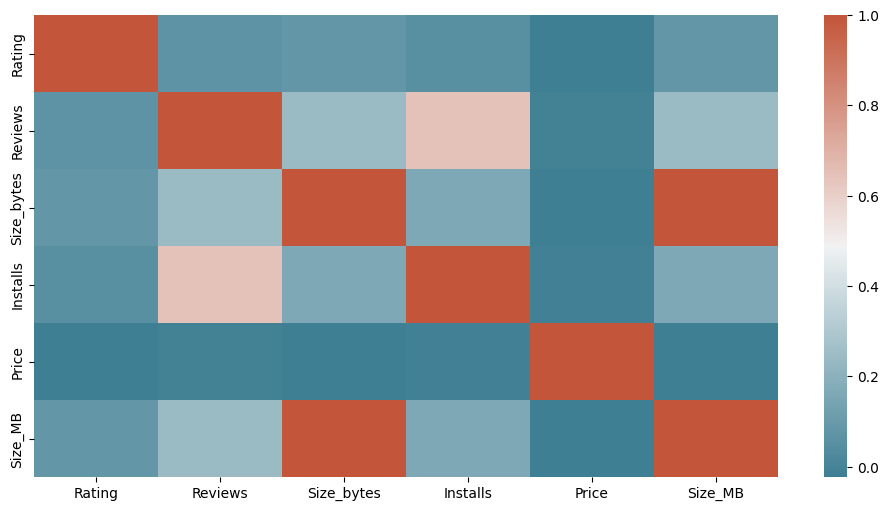

In [73]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.show()

## Pearson Correlation Coefficient ('Reviews' and 'Installs')

In [74]:
# To calculate Pearson's R, it is necessary to remove rows containing NaN or infinite values

df_clean = df.dropna()
print( df.shape )
print( df_clean.shape )

(10840, 15)
(7723, 15)


In [75]:
# calculate Pearson's R between Rating and Installs

pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


## Relationship between 'Installs_category' and 'Rating'

In [76]:
# Remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column

print(df.shape)
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)
print(df.shape)
print(f"Length of the dataframe after removing null values: {len(df)}")

(10840, 15)
(10829, 15)
Length of the dataframe after removing null values: 10829


In [77]:
df.groupby('Installs_category')['Rating']

In [78]:
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.000,4.637,0.845,1.000,4.800,5.000,5.000,5.000
Low,1278.000,4.171,0.826,1.000,3.800,4.400,4.800,5.000
Moderate,1440.000,4.035,0.604,1.400,3.800,4.200,4.500,5.000
More than moderate,1616.000,4.093,0.506,1.600,3.900,4.200,4.500,4.900
High,2113.000,4.208,0.377,1.800,4.000,4.300,4.500,4.900
Very High,2004.000,4.287,0.295,2.000,4.100,4.300,4.500,4.900
Top Notch,828.000,4.374,0.194,3.100,4.300,4.400,4.500,4.800


In [79]:
df['Rating'].isnull().sum()

1469

In [80]:
df['Installs_category'].loc[df['Rating'].isnull()]

23       More than moderate
113      More than moderate
123      More than moderate
126      More than moderate
129                Moderate
                ...        
10824              Moderate
10825                   Low
10831              Moderate
10835              Very low
10838                   Low
Name: Installs_category, Length: 1469, dtype: category
Categories (8, object): ['no' < 'Very low' < 'Low' < 'Moderate' < 'More than moderate' < 'High' < 'Very High' < 'Top Notch']

In [81]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
no                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

We can see that most of the null values from Rating column are for low/moderate Installs_category which make sense that if the app has less installations, it has less Rating and review.

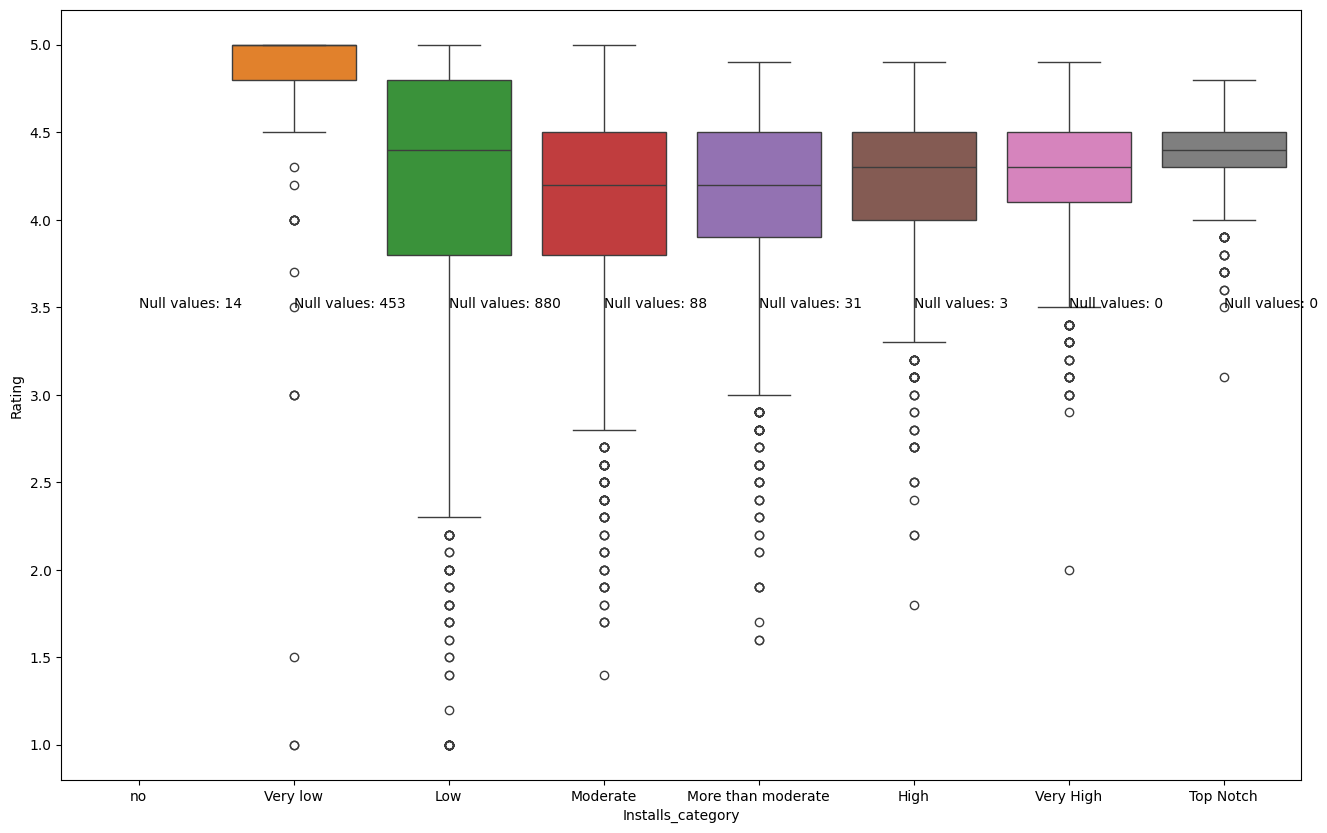

In [82]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df)

# Add the text of number of null values in each category

plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 453')
plt.text(2, 3.5, 'Null values: 880')
plt.text(3, 3.5, 'Null values: 88')
plt.text(4, 3.5, 'Null values: 31')
plt.text(5, 3.5, 'Null values: 3')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

plt.show()

## Fill missing values in column 'Rating'

In [83]:
# Fill missing values in column 'Rating' where 'Rating' is null/NaN
# Fill values is different-different for each categories of 'Installs_category'

In [84]:
def fill_missing_ratings(df, category, fill_value):
    filtered_df = df[ (df['Installs_category'] == category) & df['Rating'].isnull() ]
    df.loc[filtered_df.index, 'Rating'] = fill_value
    return df

In [85]:
filtered_df = df[(df[ 'Installs_category'] == 'Low') & df['Rating'].isnull() ]
filtered_df.head(1)

,App,Category,Rating,Reviews,Size_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB,Installs_category
478,Truth or Dare Pro,DATING,NaN,0,20971520.000,50,Paid,1.490,Teen,Dating,"September 1, 2017",1.0,4.0 and up,20.000,Low


In [86]:
filtered_df.index[0:5]

Index([478, 479, 480, 610, 613], dtype='int64')

In [87]:
df.loc[filtered_df.index, 'Rating'][0:5]

478   NaN
479   NaN
480   NaN
610   NaN
613   NaN
Name: Rating, dtype: float64

In [88]:
# fill_value is mean of: df.groupby('Installs_category')['Rating'].describe()

df = fill_missing_ratings(df, 'Low', 4.170970)
df = fill_missing_ratings(df, 'Very low', 4.637037)
df = fill_missing_ratings(df, 'Moderate', 4.035417)
df = fill_missing_ratings(df, 'More than moderate', 4.093255)
df = fill_missing_ratings(df, 'High', 4.207525)
df = fill_missing_ratings(df, 'no', 0)

In [89]:
df['Installs_category'].loc[df['Rating'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

In [90]:
df['Rating'].isnull().sum()

0

## Relationship between 'Installs_category' and 'Reviews'

In [91]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int32

In [92]:
df['Reviews'].isnull().sum()

0

In [93]:
df.groupby('Installs_category')['Reviews'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,14.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Very low,534.000,0.903,1.946,0.000,0.000,0.000,1.000,20.000
Low,2158.000,19.967,46.066,0.000,2.000,7.000,19.000,787.000
Moderate,1528.000,268.584,562.686,0.000,51.000,114.000,249.000,10249.000
More than moderate,1647.000,2691.725,4559.975,0.000,518.500,1205.000,2921.000,57076.000
High,2116.000,27137.232,33710.780,1.000,7059.750,16193.500,33674.000,376223.000
Very High,2004.000,265066.762,334254.774,66.000,68637.750,155557.500,319713.250,3093932.000
Top Notch,828.000,5097933.720,9405582.611,9602.000,1013766.500,2325369.500,5395504.500,78158306.000


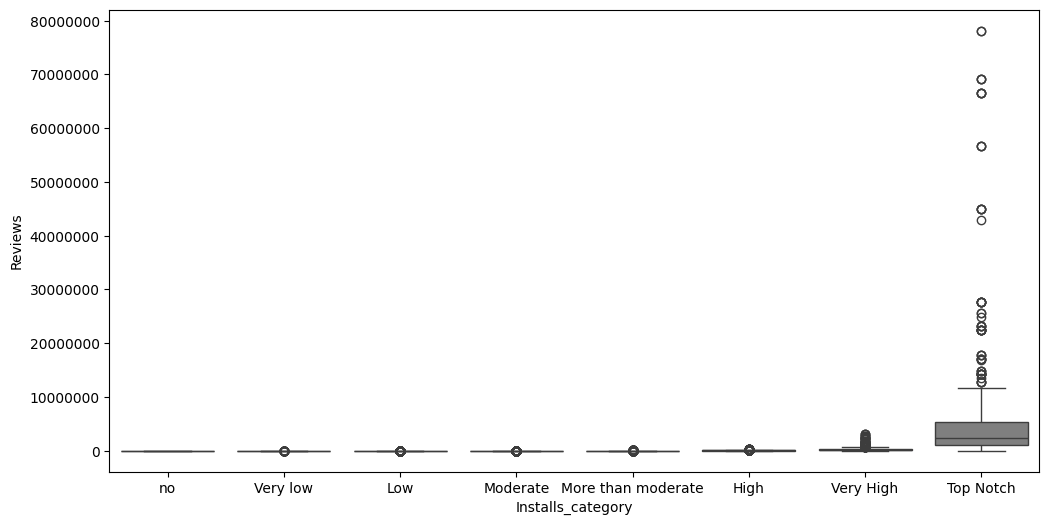

In [94]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Installs_category', y='Reviews', hue='Installs_category', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

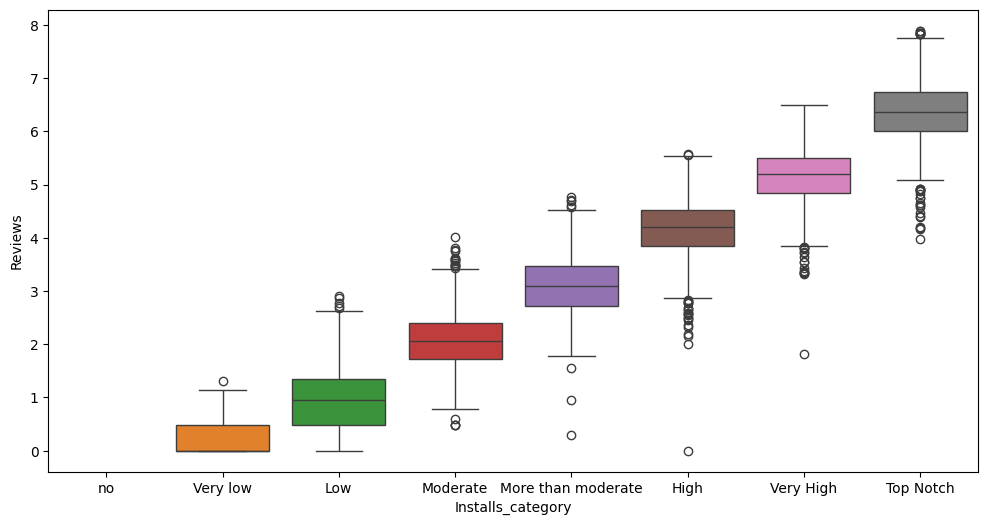

In [95]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Installs_category', y=np.log10(df['Reviews']), hue='Installs_category', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [96]:
temp_log = np.log10(df['Reviews'])
print(f'min: {min(temp_log)}, max: {max(temp_log)}')

min: -inf, max: 7.892975137931482


In [97]:
# The .assign() method is a way to add new columns to a DataFrame (or a temporary view of it) without modifying the original DataFrame in place

df[['Reviews']].assign(review_log=temp_log).head()

,Reviews,review_log
0,159,2.201
1,967,2.985
2,87510,4.942
3,215644,5.334
4,967,2.985


## Scatter plot between Rating, Reviews and Installs_category

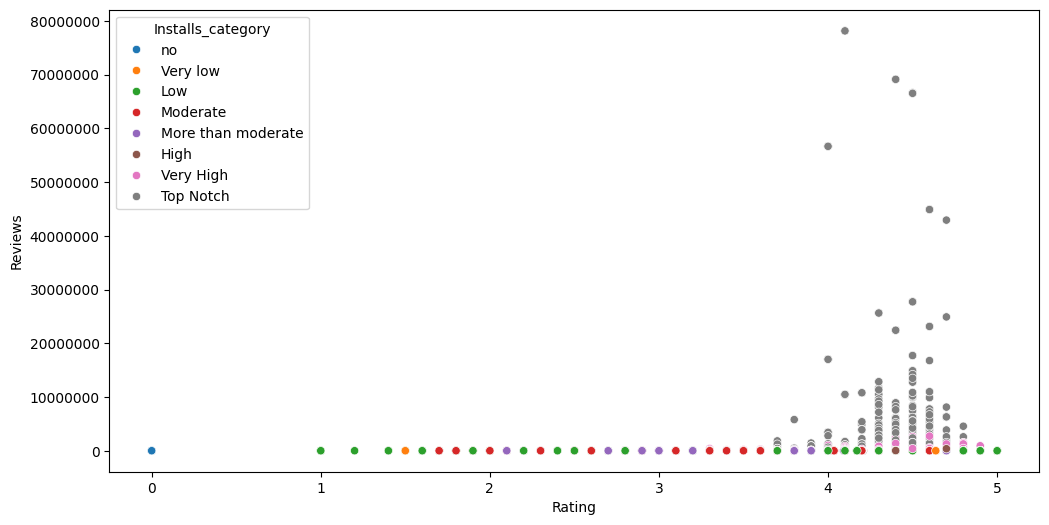

In [98]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.

## Scatter plot between Reviews and Installs

In [99]:
df[['Installs','Reviews']].head()

,Installs,Reviews
0,10000,159
1,500000,967
2,5000000,87510
3,50000000,215644
4,100000,967


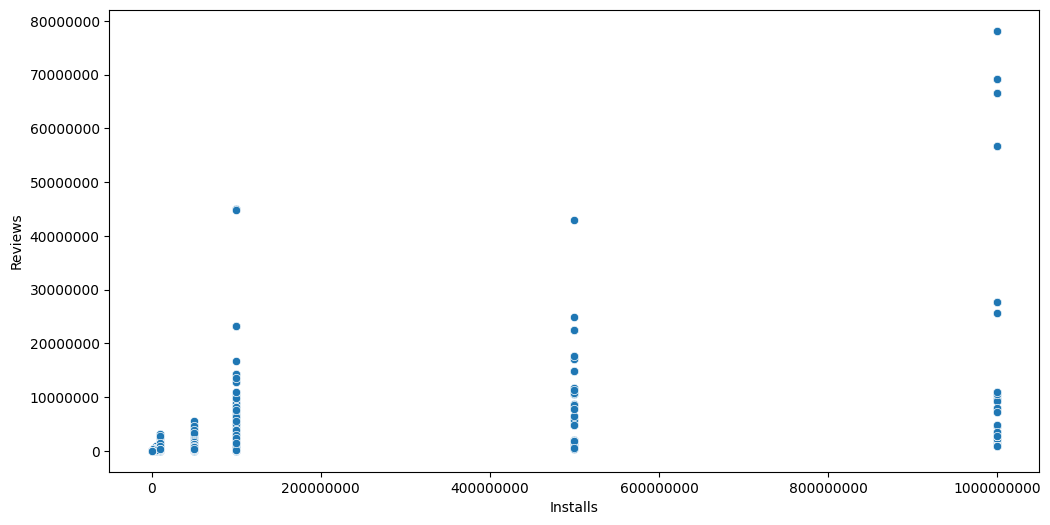

In [100]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Installs', y='Reviews', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

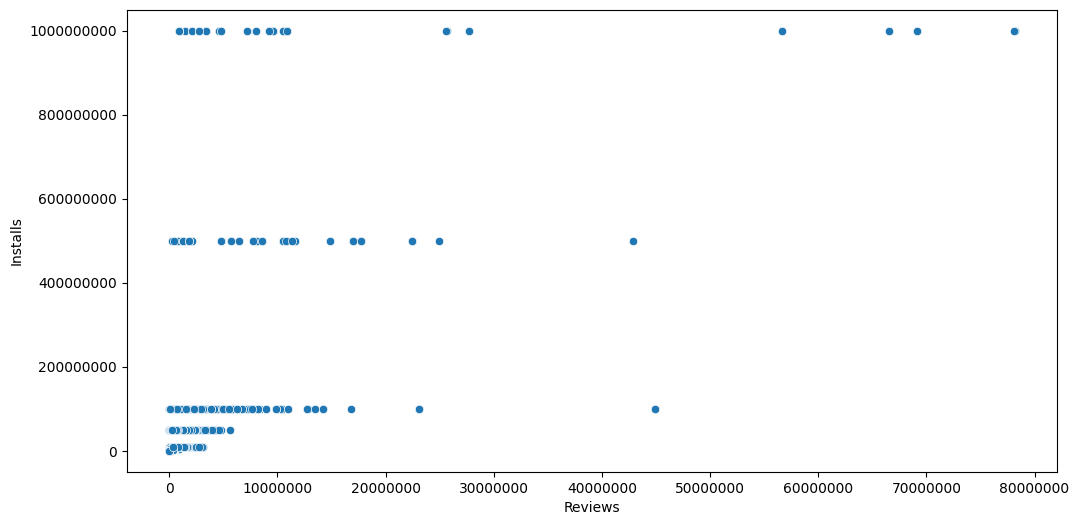

In [101]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Reviews', y='Installs', data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

We did not see any trend and the issue is we need to normalize the data before plotting it.

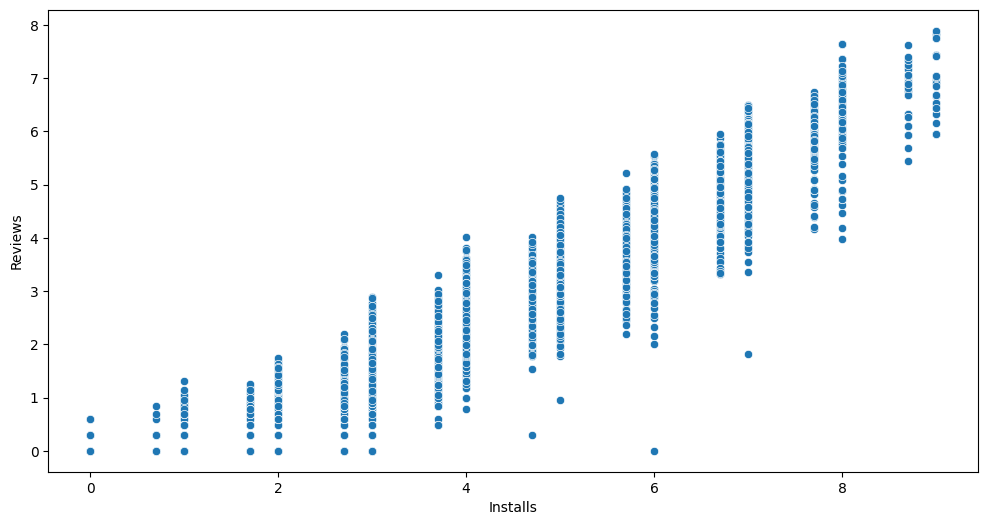

In [102]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=np.log10(df['Installs']), y=np.log10(df['Reviews']), data=df)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

We see a slight trend but still the issue is installs are not discreet number not continuous one.

## Scatter plot with trend line between Reviews and Installs

<Figure size 1600x1200 with 0 Axes>

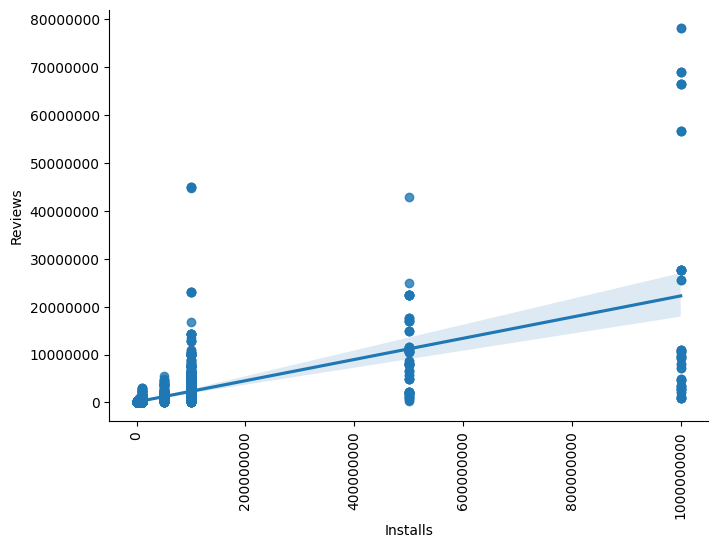

In [103]:
plt.figure(figsize=(16, 12))
sns.lmplot(x='Installs', y='Reviews', data=df, aspect=16/12)
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=90)
plt.show()

Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

## Duplicates

In [104]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838    False
10839    False
10840    False
Length: 10829, dtype: bool

In [105]:
df.duplicated().sum()

483

In [106]:
for col in df.columns:
    print(f"Number of duplicates in '{col}' column are: {df[col].duplicated().sum()}")

Number of duplicates in 'App' column are: 1181
Number of duplicates in 'Category' column are: 10796
Number of duplicates in 'Rating' column are: 10784
Number of duplicates in 'Reviews' column are: 4830
Number of duplicates in 'Size_bytes' column are: 10373
Number of duplicates in 'Installs' column are: 10809
Number of duplicates in 'Type' column are: 10827
Number of duplicates in 'Price' column are: 10737
Number of duplicates in 'Content Rating' column are: 10823
Number of duplicates in 'Genres' column are: 10710
Number of duplicates in 'Last Updated' column are: 9453
Number of duplicates in 'Current Ver' column are: 7998
Number of duplicates in 'Android Ver' column are: 10796
Number of duplicates in 'Size_MB' column are: 10373
Number of duplicates in 'Installs_category' column are: 10821


In [107]:
df['Category'].value_counts()

Category
FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [108]:
print( len(df['Category']) )
print( df['Category'].duplicated().sum() )
print( len(df['Category'].value_counts().index) )

print(f'{df['Category'].duplicated().sum()}+{len(df['Category'].value_counts().index)} = \
{df['Category'].duplicated().sum()+len(df['Category'].value_counts().index)}')

10829
10796
33
10796+33 = 10829


There are 33 unique values in 'Category' column. Total values in 'Category' column is 10829. Obviously 10829-33=10796 values are duplicates of 33 unique values of 'Category' column.

In [109]:
df.duplicated().sum()

483

In [110]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [111]:
df.shape

(10346, 15)

## Which category has the highest number of apps?

In [112]:
df['Category'].value_counts().head(10)

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

## Which category has the highest number of installs?

In [113]:
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

## Which category has the highest number of reviews?

In [114]:
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int32

## Which category has the highest rating?

In [115]:
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                4.394
EDUCATION             4.374
BOOKS_AND_REFERENCE   4.358
PERSONALIZATION       4.322
ART_AND_DESIGN        4.299
GAME                  4.282
HEALTH_AND_FITNESS    4.274
PARENTING             4.260
SHOPPING              4.253
SPORTS                4.253
Name: Rating, dtype: float64

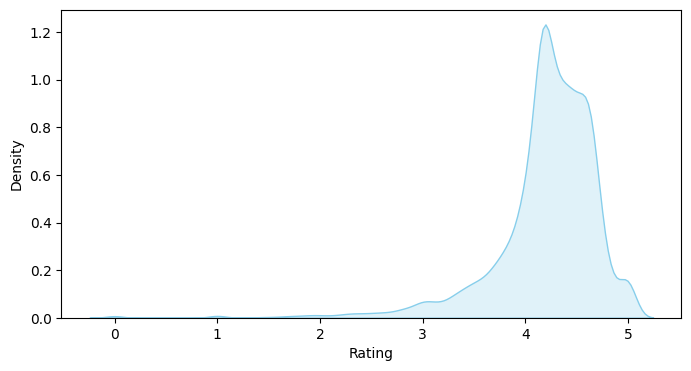

In [116]:
plt.figure(figsize=(8, 4))
# The distribution plot
sns.kdeplot(df['Rating'], color="skyblue", shade=True)
plt.show()

In [128]:
# Extract the 'Rating' series
ratings = df['Rating']

# 1. Choose a kernel function (Gaussian)
def gaussian_kernel(u):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * u**2)

# 2. Select a bandwidth (you might need to experiment with this)
# Using Silverman's rule of thumb:
bandwidth = 1.06 * ratings.std() * (len(ratings))**(-1/5)
# We can also try a manual value:
# bandwidth = 0.5

# 3. Define the range of x values for density estimation
x_min = ratings.min() - 1
x_max = ratings.max() + 1
x_values = np.linspace(x_min, x_max, 200)  # Generate 200 points

# 4. Calculate the density estimate for each x value
density_estimates = []
n = len(ratings)
for x in x_values:
    density = 0
    for xi in ratings:
        u = (x - xi) / bandwidth
        density += gaussian_kernel(u)
    density_estimates.append(density / (n * bandwidth))

Calculated Bandwidth (Silverman's rule): 0.0862


In [142]:
print(f'Calculated Bandwidth (Silverman rule): {bandwidth:.4f}')
print(f'x_min: {x_min}')
print(f'x_max: {x_max}')
print(f'len_ratings: {n}')
print(f'len_x_values: {len(x_values)}')
print(f'len_density_estimates: {len(density_estimates)}')
print(f'\nx_values: \n{x_values[0:20]}')
print(f'\ndensity_estimates: \n{density_estimates[0:20]}')

Calculated Bandwidth (Silverman rule): 0.0862
x_min: -1.0
x_max: 6.0
len_ratings: 10346
len_x_values: 200
len_density_estimates: 200

x_values: 
[-1.         -0.96482412 -0.92964824 -0.89447236 -0.85929648 -0.8241206
 -0.78894472 -0.75376884 -0.71859296 -0.68341709 -0.64824121 -0.61306533
 -0.57788945 -0.54271357 -0.50753769 -0.47236181 -0.43718593 -0.40201005
 -0.36683417 -0.33165829]

density_estimates: 
[3.936852212237037e-32, 4.105723481934021e-30, 3.6254833289764277e-28, 2.7106769300491015e-26, 1.716031430357982e-24, 9.198316473144876e-23, 4.174717462274778e-21, 1.6042847699934391e-19, 5.22001155034733e-18, 1.4381265316774298e-16, 3.354736117559427e-15, 6.626058432911495e-14, 1.1081225423923314e-12, 1.569119246151689e-11, 1.8813072974525163e-10, 1.909849573906915e-09, 1.641625975659518e-08, 1.19477162507202e-07, 7.362600154916908e-07, 3.841609021637001e-06]


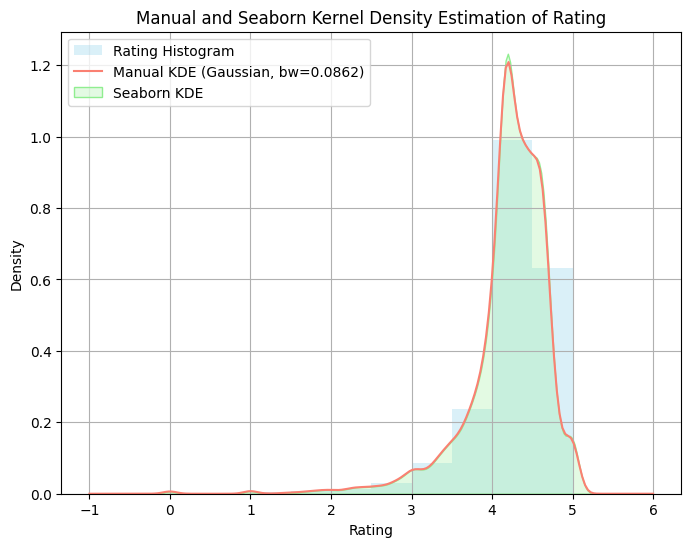

In [129]:
# Plot the results
plt.figure(figsize=(8, 6))

# Plot the histogram of the data
plt.hist(ratings, density=True, alpha=0.3, color='skyblue', label='Rating Histogram')

# Plot the manual KDE
plt.plot(x_values, density_estimates, color='salmon', label=f'Manual KDE (Gaussian, bw={bandwidth:.4f})')

# Plot Seaborn's KDE for comparison
sns.kdeplot(ratings, color="lightgreen", shade=True, label='Seaborn KDE')

plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Manual and Seaborn Kernel Density Estimation of Rating')
plt.legend()
plt.grid(True)
plt.show()

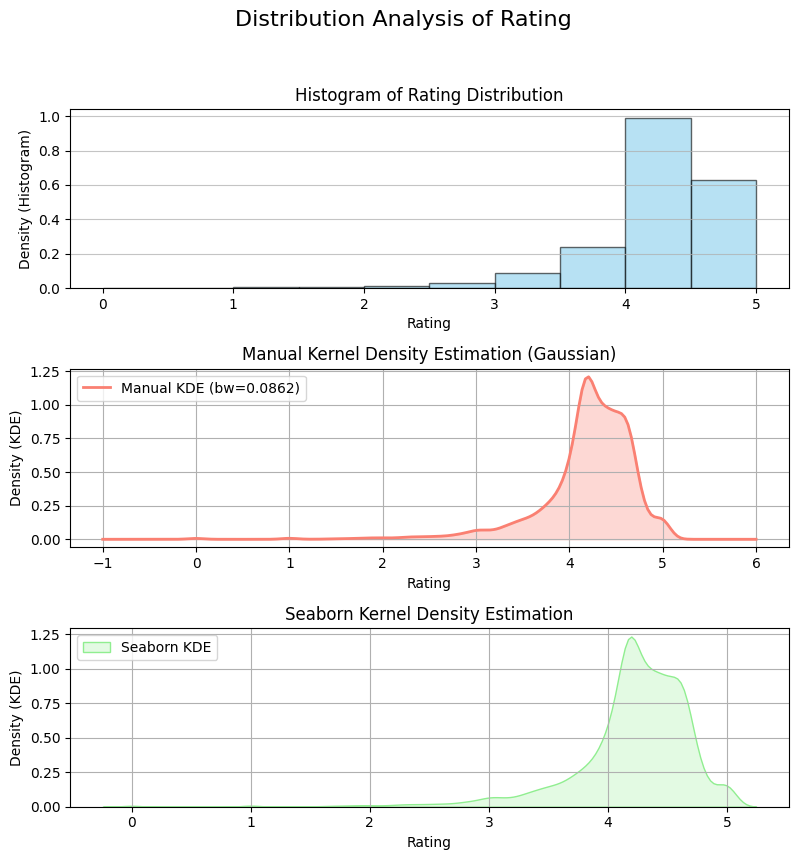

In [127]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 9))
fig.suptitle('Distribution Analysis of Rating', fontsize=16)

# Plot 1: Histogram of the Data
axes[0].hist(ratings, bins=10, density=True, alpha=0.6, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Density (Histogram)')
axes[0].set_title('Histogram of Rating Distribution')
axes[0].grid(axis='y', alpha=0.75)

# Plot 2: Manual KDE
axes[1].plot(x_values, density_estimates, color='salmon', linewidth=2, label=f'Manual KDE (bw={bandwidth:.4f})')
axes[1].fill_between(x_values, density_estimates, alpha=0.3, color='salmon')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Density (KDE)')
axes[1].set_title('Manual Kernel Density Estimation (Gaussian)')
axes[1].legend()
axes[1].grid(True)

# Plot 3: Seaborn KDE
sns.kdeplot(ratings, ax=axes[2], color="lightgreen", shade=True, label='Seaborn KDE')
axes[2].set_xlabel('Rating')
axes[2].set_ylabel('Density (KDE)')
axes[2].set_title('Seaborn Kernel Density Estimation')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent overlap
plt.show()